<h1 style='text-align: center'> ROYAL UNIVERSITY OF BHUTAN </h1>
<h2 style='text-align: center'> COLLEGE OF SCIENCE AND TECHNOLOGY RINCHHENDING </h2>
<h2 style='text-align: center'>  ཚན་རིག་དང་འཕྲུལ་རིག་མཐོ་རིམ་སློབ་གྲྭ། </h2>     
<h2 style='text-align: center'>  CTE411- Artifical Intelligence </h2>        
<h1 style='text-align: center'> BE in Information and Technology </h1><br><br><br><br><br>

<div style='line-height:5px; font-weight: bold; font-size:17px' >
<p>Name: Sonam Dema </p>
<p>Std No: 02200164 </p>
<p>4 IT </p>
<p>Lab Report 9 </p>
<p>Date: 23/10/2023</p>
</div><br>




#### 1. Aim:

Application of simple min-max application and alpha-beta pruning




#### 2. Background / Theory:

######  Minimax Algorithm:

The Minimax algorithm relies on systematic searching, or more accurately said on brute force and a simple evaluation function. In every time during deciding of the next move, it search through a whole tree, all the way down to leave. It performs a depth-first search algorithm for the exploration of the complete game tree. 
. 

##### Alpha-Beta Pruning:

Alpha–beta is actually an improved minimax using a heuristic. It stops evaluating a move when it makes sure that it's worse than the previously examined move.When it is added to a simple minimax algorithm, it gives the same output, but cuts off certain branches that can't possibly affect the final decision which dramatically improving the performance.













#### 3. Apparatus/software used.
- Jupyter Notebook

#### 4. Algorithm/Code: 

#### 4.1) Implementation of MiniMax


In [1]:
import time

class Game:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        # Player X always plays first
        self.player_turn = 'X'

    def draw_board(self):
        for i in range(0, 3):
            for j in range(0, 3):
                print('{}|'.format(self.current_state[i][j]), end=" ")
            print()
        print()

    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True

    def is_end(self):
        # Vertical win
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                return self.current_state[0][i]

        # Horizontal win
        for i in range(0, 3):
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'

        # Main diagonal win
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            return self.current_state[0][0]

        # Second diagonal win
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
            return self.current_state[0][2]

        # Is the whole board full?
        for i in range(0, 3):
            for j in range(0, 3):
                # There's an empty field, we continue the game
                if (self.current_state[i][j] == '.'):
                    return None

        # It's a tie!
        return '.'

    def max(self):
        # Possible values for maxv are:
        # -1 - loss
        # 0  - a tie
        # 1  - win

        # We're initially setting it to -2 as worse than the worst case:
        maxv = -2

        px = None
        py = None

        result = self.is_end()

        # If the game came to an end, the function needs to return
        # the evaluation function of the end. That can be:
        # -1 - loss
        # 0  - a tie
        # 1  - win
        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    # On the empty field player 'O' makes a move and calls Min
                    # That's one branch of the game tree.
                    self.current_state[i][j] = 'O'
                    (m, min_i, min_j) = self.min()
                    # Fixing the maxv value if needed
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    # Setting back the field to empty
                    self.current_state[i][j] = '.'
        return (maxv, px, py)

        
    def min(self):
        # ... (same implementation as before)
                # Possible values for minv are:
        # -1 - win
        # 0  - a tie
        # 1  - loss

        # We're initially setting it to 2 as worse than the worst case:
        minv = 2

        qx = None
        qy = None

        result = self.is_end()

        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.max()
                    if m < minv:
                        minv = m
                        qx = i
                        qy = j
                    self.current_state[i][j] = '.'

        return (minv, qx, qy)
    

    def play(self):
        
        while True:
            self.draw_board()
            self.result = self.is_end()

            # Printing the appropriate message if the game has ended
            if self.result is not None:
                if self.result == 'X':
                    print('The winner is X!')
                elif self.result == 'O':
                    print('The winner is O!')
                elif self.result == '.':
                    print("It's a tie!")

                self.initialize_game()
                return

            # If it's player's turn
            if self.player_turn == 'X':
                while True:
                    start = time.time()
                    (m, qx, qy) = self.min()
                    end = time.time()
                    print('Evaluation time: {}s'.format(round(end - start, 7)))
                    print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                    px = int(input('Insert the X coordinate: '))
                    py = int(input('Insert the Y coordinate: '))

                    if self.is_valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break
                    else:
                        print('The move is not valid! Try again.')

            # If it's AI's turn
            else:
                (m, px, py) = self.max()
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'

def main():
    g = Game()
    g.play()

if __name__ == "__main__":
    main()


.| .| .| 
.| .| .| 
.| .| .| 

Evaluation time: 5.6173205s
Recommended move: X = 0, Y = 0
Insert the X coordinate: 0
Insert the Y coordinate: 0
X| .| .| 
.| .| .| 
.| .| .| 

X| .| .| 
.| O| .| 
.| .| .| 

Evaluation time: 0.0608401s
Recommended move: X = 0, Y = 1
Insert the X coordinate: 0
Insert the Y coordinate: 1
X| X| .| 
.| O| .| 
.| .| .| 

X| X| O| 
.| O| .| 
.| .| .| 

Evaluation time: 0.0020039s
Recommended move: X = 2, Y = 0
Insert the X coordinate: 2
Insert the Y coordinate: 0
X| X| O| 
.| O| .| 
X| .| .| 

X| X| O| 
O| O| .| 
X| .| .| 

Evaluation time: 0.0s
Recommended move: X = 1, Y = 2
Insert the X coordinate: 1
Insert the Y coordinate: 2
X| X| O| 
O| O| X| 
X| .| .| 

X| X| O| 
O| O| X| 
X| O| .| 

Evaluation time: 0.0s
Recommended move: X = 2, Y = 2
Insert the X coordinate: 2
Insert the Y coordinate: 2
X| X| O| 
O| O| X| 
X| O| X| 

It's a tie!


#### 4.2) Implementation of Alpha-Beta Pruning


In [6]:
import time
class Game:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        # Player X always plays first
        self.player_turn = 'X'
   
    def draw_board(self):
        for i in range(0, 3):
            for j in range(0, 3):
                print('{}|'.format(self.current_state[i][j]), end=" ")
            print()
        print()

    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True

    def is_end(self):
        # Vertical win
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                return self.current_state[0][i]

        # Horizontal win
        for i in range(0, 3):
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'

        # Main diagonal win
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            return self.current_state[0][0]

        # Second diagonal win
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
            return self.current_state[0][2]

        # Is the whole board full?
        for i in range(0, 3):
            for j in range(0, 3):
                # There's an empty field, we continue the game
                if (self.current_state[i][j] == '.'):
                    return None

        # It's a tie!
        return '.'

    def max_alpha_beta(self, alpha, beta):
        maxv = -2
        px = None
        py = None

        result = self.is_end()

        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'O'
                    (m, min_i, in_j) = self.min_alpha_beta(alpha, beta)
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    self.current_state[i][j] = '.'

                    # Next two ifs in Max and Min are the only difference between regular algorithm and minimax
                    if maxv >= beta:
                        return (maxv, px, py)

                    if maxv > alpha:
                        alpha = maxv

        return (maxv, px, py)
       

        
    def min_alpha_beta(self, alpha, beta):

        minv = 2

        qx = None
        qy = None

        result = self.is_end()

        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.max_alpha_beta(alpha, beta)
                    if m < minv:
                        minv = m
                        qx = i
                        qy = j
                    self.current_state[i][j] = '.'

                    if minv <= alpha:
                        return (minv, qx, qy)

                    if minv < beta:
                        beta = minv

        return (minv, qx, qy)
    

    def play_alpha_beta(self):
        while True:
            self.draw_board()
            self.result = self.is_end()

            if self.result != None:
                if self.result == 'X':
                    print('The winner is X!')
                elif self.result == 'O':
                    print('The winner is O!')
                elif self.result == '.':
                    print("It's a tie!")


                self.initialize_game()
                return

            if self.player_turn == 'X':

                while True:
                    start = time.time()
                    (m, qx, qy) = self.min_alpha_beta(-2, 2)
                    end = time.time()
                    print('Evaluation time: {}s'.format(round(end - start, 7)))
                    print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                    px = int(input('Insert the X coordinate: '))
                    py = int(input('Insert the Y coordinate: '))

                    qx = px
                    qy = py

                    if self.is_valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break
                    else:
                        print('The move is not valid! Try again.')

            else:
                (m, px, py) = self.max_alpha_beta(-2, 2)
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'           

def main():
    g = Game()
    g.play_alpha_beta()

if __name__ == "__main__":
    main()


.| .| .| 
.| .| .| 
.| .| .| 

Evaluation time: 0.1901441s
Recommended move: X = 0, Y = 0
Insert the X coordinate: 0
Insert the Y coordinate: 0
X| .| .| 
.| .| .| 
.| .| .| 

X| .| .| 
.| O| .| 
.| .| .| 

Evaluation time: 0.0149045s
Recommended move: X = 0, Y = 1
Insert the X coordinate: 0
Insert the Y coordinate: 1
X| X| .| 
.| O| .| 
.| .| .| 

X| X| O| 
.| O| .| 
.| .| .| 

Evaluation time: 0.0009367s
Recommended move: X = 2, Y = 0
Insert the X coordinate: 2
Insert the Y coordinate: 0
X| X| O| 
.| O| .| 
X| .| .| 

X| X| O| 
O| O| .| 
X| .| .| 

Evaluation time: 0.0s
Recommended move: X = 1, Y = 2
Insert the X coordinate: 1
Insert the Y coordinate: 2
X| X| O| 
O| O| X| 
X| .| .| 

X| X| O| 
O| O| X| 
X| O| .| 

Evaluation time: 0.0s
Recommended move: X = 2, Y = 2
Insert the X coordinate: 2
Insert the Y coordinate: 2
X| X| O| 
O| O| X| 
X| O| X| 

It's a tie!


#### 5. Results:
5.1) Minimax Algorithm

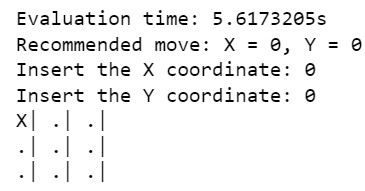                     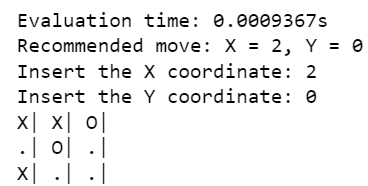

5.2) Alpha-beta Pruning
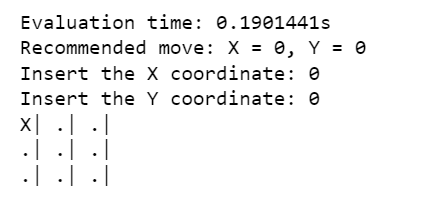                 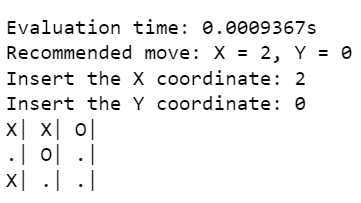

#### 6. Conclusion:
After completing this lab, I have gained a clear understanding of the importance of alpha-beta pruning in evaluating large and complex game trees. Through the application of simple min-max algorithms and understanding the integration of alpha-beta pruning, I have witnessed how these techniques dramatically enhance the efficiency of decision-making processes in game-playing scenarios like tic-tac-toe.Moreover the benefit of alpha-beta pruning over minimax algorithm due to less time complexity.

#### 7. References:

Artificial Intelligence | Alpha-Beta Pruning - JavatPoint. (n.d.). www.javatpoint.com. https://www.javatpoint.com/ai-alpha-beta-pruning
Krivokuća, M. (2023). Minimax with Alpha-Beta Pruning in Python. Stack Abuse. https://stackabuse.com/minimax-and-alpha-beta-pruning-in-python/
